In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import os

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
# 1. Cargar datos
with open(os.path.join("..", "resultado de modelos", "clientes_13_pca.pkl"), "rb") as f:
    data=pickle.load(f)

print("Datos cargados")
data

Datos cargados


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,-0.070965,1.639117,-0.949104,-1.614886,1.444708,-1.522571,0.461713,0.191843,0.163219,0.011563,2.409636,0.132498,1.113653
1,0.074525,-1.365392,-0.067221,1.475757,1.912203,-1.648195,-0.232464,-0.565616,0.838064,1.490444,-1.508063,-1.756279,-0.456020
2,2.446112,-0.021541,-1.672909,-0.503644,1.423608,1.031941,0.352770,0.059116,-0.295837,0.297221,0.064949,-0.149334,1.555595
3,-2.229273,0.289592,1.547714,0.714328,1.839087,0.388309,-0.143093,-0.087707,-0.299413,1.149827,-0.298460,0.303777,0.217819
4,0.020966,-0.463182,1.141923,-1.164293,1.633471,0.481686,0.034372,0.021744,-0.200478,0.384598,-0.235039,0.198435,1.265732
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,-2.109157,0.598832,1.488403,0.137773,-0.726875,-0.006811,-1.152193,-1.725024,-1.651181,0.425424,0.092348,0.095185,0.220203
19996,-0.754068,1.184363,1.366890,-0.724002,-1.139305,0.435037,1.947109,-0.013533,-0.223688,0.309858,-0.215363,-0.382523,0.028241
19997,-0.638750,-1.004732,1.187008,-1.367696,1.438868,0.635724,0.393561,0.220170,0.064352,-1.229603,0.280152,-0.329556,0.680221
19998,-0.993732,-1.309778,1.786034,0.822677,-0.885360,0.414833,1.865206,-0.075128,-0.071178,-0.033135,-0.186911,-0.143491,0.050666


In [3]:
#2 Asignamos nuestras variables numericas a X

X = data


**Escalado de variables**

las variables que se usan son los 13 PCA, las cuales ya se encuentran escaladas y convertidas a numericas, todo este procesamiento se realizó en el notebook PCA_clientes.ipynb

In [4]:
X_scaled = X

In [5]:
#4 Definir y entrenar modelo
kmeans = KMeans(n_clusters=3, random_state=42)
data["cluster"] = kmeans.fit_predict(X_scaled)

In [6]:
print("Inercia", kmeans.inertia_)
#no es tan bueno, por que va depender del número de clúster

Inercia 305340.4338924885


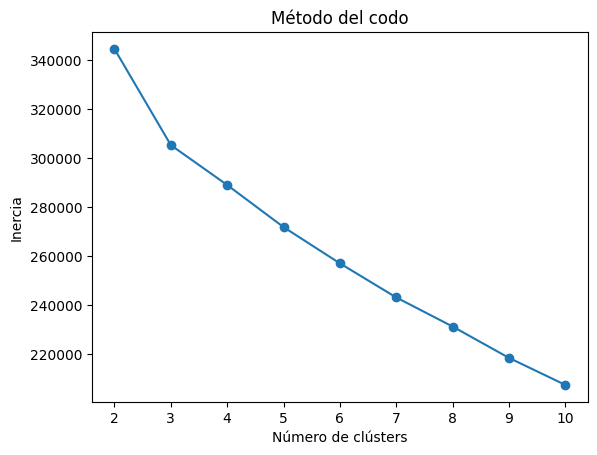

In [7]:
#Método del codo
inertias = []
for k in range(2,11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertias.append(km.inertia_)

plt.plot(range(2,11), inertias, marker = 'o')
plt.xlabel('Número de clústers')
plt.ylabel('Inercia')
plt.title('Método del codo')
plt.show()

In [8]:
#Metrica de la silueta
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(X_scaled, kmeans.labels_ )
print("Coeficiente de silueta: ", sil_score)

Coeficiente de silueta:  0.133471237892688


<function matplotlib.pyplot.show(close=None, block=None)>

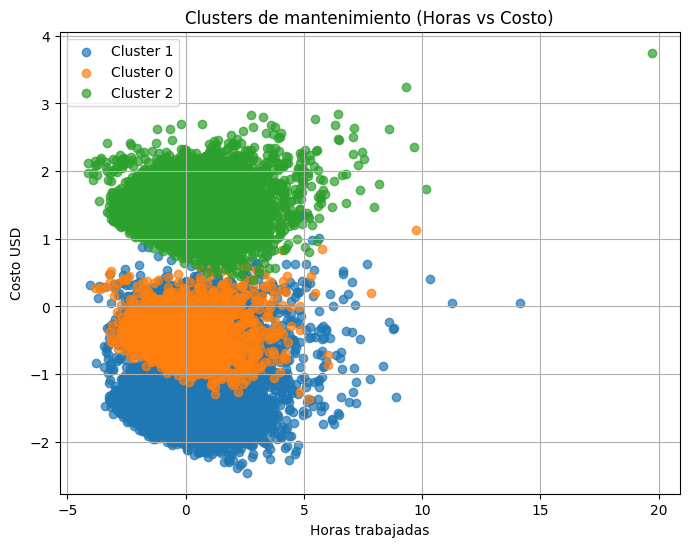

In [12]:
#5 gráfica
plt.figure(figsize=(8,6))
for cluster in data ["cluster"].unique():
    subset = data[data["cluster"]==cluster]
    plt.scatter(subset["PC1"], subset["PC3"], label =f"Cluster {cluster}", alpha=0.7)

plt.title("Clusters de mantenimiento (Horas vs Costo)")
plt.xlabel("Horas trabajadas")
plt.ylabel("Costo USD")
plt.legend()
plt.grid(True)
plt.show

In [11]:
#6 Resumen
print("\nCantidad de registros por clúster")
print(data["cluster"].value_counts())


Cantidad de registros por clúster
cluster
1    9997
2    7928
0    2075
Name: count, dtype: int64
